In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la

def e1(n, W, v, w, k):
    return n*W - np.sqrt(v*v + w*w + 2*v*w*np.cos(k))

def e2(n, W, v, w, k):
    return n*W + np.sqrt(v*v + w*w + 2*v*w*np.cos(k))
    
def e1v(n, W, v, w, kv):
    return [e1(n, W, v, w, i) for i in kv]
def e2v(n, W, v, w, kv):
    return [e2(n, W, v, w, i) for i in kv]

In [119]:
W = 0.3
V = 0.1
g0 = 1
delta = 00
t = 0.5
d = 1

v = g0 + delta - V*np.cos(W*t)
w = g0 - delta + V*np.cos(W*t)
kv = np.arange(-d*np.pi, d*np.pi, 0.1)

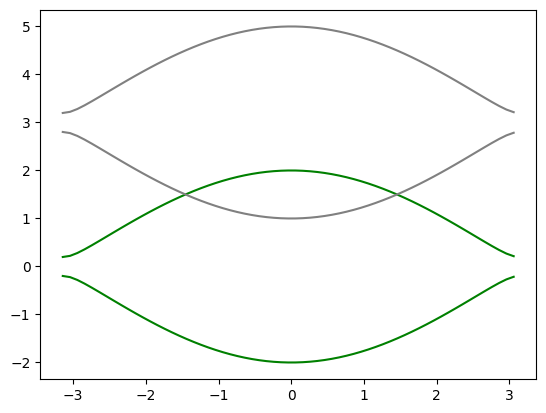

In [120]:
n=0
plt.plot(kv, e1v(n, W, v, w, kv), color='green')
plt.plot(kv, e2v(n, W, v, w, kv), color='green')
n=10
plt.plot(kv, e1v(n, W, v, w, kv), color='grey')
plt.plot(kv, e2v(n, W, v, w, kv), color='grey')

# n=-10
# plt.plot(kv, e1v(n, W, v, w, kv), color='grey')
# plt.plot(kv, e2v(n, W, v, w, kv), color='grey')
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
import scipy.integrate as integrate

In [257]:
def H2x2(v, w, k):
    return np.array([[0, v + w*np.exp(1j*k)],[v + w*np.exp(-1j*k), 0]])
def Hnm(n, m, v, w, k, V, W):
    hnm = np.zeros((2,2), dtype=complex)
    T = 2*np.pi/W
    hnm[0,1] = (1/T)*(integrate.quad(lambda t: np.real(((v - V*np.cos(W*t)) + (w + V*np.cos(W*t))*np.exp(1j*k))*np.exp(1j*(m-n)*W*t)), 0, 2*np.pi/W)[0] + 1j*integrate.quad(lambda t: np.imag(((v - V*np.cos(W*t)) + (w + V*np.cos(W*t))*np.exp(1j*k))*np.exp(-1j*(m-n)*W*t)), 0, 2*np.pi/W)[0])
    hnm[1,0] = (1/T)*(integrate.quad(lambda t: np.real(((v - V*np.cos(W*t)) + (w + V*np.cos(W*t))*np.exp(-1j*k))*np.exp(1j*(m-n)*W*t)), 0, 2*np.pi/W)[0] + 1j*integrate.quad(lambda t: np.imag(((v - V*np.cos(W*t)) + (w + V*np.cos(W*t))*np.exp(-1j*k))*np.exp(-1j*(m-n)*W*t)), 0, 2*np.pi/W)[0])
    return hnm

In [258]:
def Hf(lat, v, w, k, V, W):
    blocks = []
    for i in range(1, lat+1):
        row = []
        for j in range(1, lat+1):
            matij = Hnm(i, j, v, w, k, V, W)
            if (i==j):
                matij = matij - i*W*np.eye(2,dtype=complex)
            row.append(matij)
        blocks.append(row)
    m = np.block(blocks)
    # for i in range(m.shape[0]):
    #     m[i,i] = m[i,i] - i*W
    return m

In [339]:
g0 = 2
delta = -0.5
v = g0 + delta
w = g0 - delta
V = 0
W = 5*g0 
dk = 0.01

kv = np.arange(-np.pi, np.pi+dk , dk)
latsize = 3
bands = [ [] for i in range(2*latsize) ]
for i in kv:
    eigs = np.sort(la.eigvals(Hf(latsize, v, w, i, V, W)))
    for j in range(2*latsize):
        bands[j].append(np.real(eigs[j]))

In [340]:
# gaps = []
# for i in range(len(bands)):
#     if (i==0):
#         if (np.max(bands[i]) < np.min(bands[i+1])):
#             gaps.append([np.max(bands[i]), np.min(bands[i+1])])
#     elif(i==len(bands)-1):
#         if (np.min(bands[i]) < np.max(bands[i-1])):
#             gaps.append([np.max(bands[i-1]), np.min(bands[i])])
#     else:
#         if (np.max(bands[i]) < np.min(bands[i+1])):
#             gaps.append([np.max(bands[i]), np.min(bands[i+1])])
#         if (np.min(bands[i]) < np.max(bands[i-1])):
#             gaps.append([np.max(bands[i-1]), np.min(bands[i])])
# gaps = np.array(gaps)
# gaps = gaps.reshape((1,10))

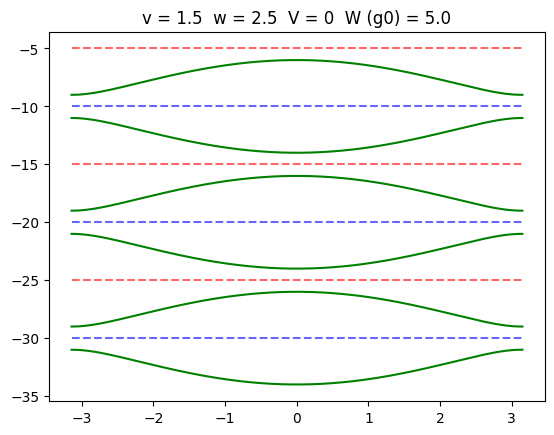

In [341]:
fig, ax = plt.subplots(1,1)
for i in range(2*latsize):
    ax.plot(kv, bands[i], 'green')
    # ax.fill_between(kv, bands[i], facecolor ='orange', alpha=0.1)
    # ax.fill_between(kv, 1, where=bands[i] == 0, facecolor1='green', alpha=.5)
a = 0.3
c = 'steelblue'
o = 'orange'
r = 'r'
# b = 'b'
# ax.axhspan(gaps[0,0],gaps[0,1], 0, 1,facecolor =c, alpha = a)
# ax.axhspan(gaps[0,2],gaps[0,3], 0, 1,facecolor =o, alpha = a)
# ax.axhspan(gaps[0,4],gaps[0,5], 0, 1,facecolor =c, alpha = a)
# ax.axhspan(gaps[0,6],gaps[0,7], 0, 1,facecolor =r, alpha = a)
# ax.axhspan(gaps[0,8],gaps[0,9], 0, 1,facecolor =b, alpha = a)
plt.hlines(y=[-1*W, -2*W, -3*W, -W/2, -3*W/2, -5*W/2], xmin = -np.pi, xmax = np.pi, colors=['b','b','b','r','r','r' ], linestyles=['--','--','--','--','--','--'], alpha=0.6)
tit = 'v = ' + str(v) + '  w = ' + str(w) + '  V = ' +str(V) + '  W (g0) = ' + str(W/g0)
plt.title(tit)
plt.savefig('quasiBandstucture/'+tit+'.png')
# plt.show()

In [110]:
gaps

array([[-11.17491722, -10.37491722,  -9.00000074,  -8.49999934,
         -7.4       ,  -6.6       ,  -5.50000066,  -4.99999926,
         -3.62508278,  -2.82508278]])

In [6]:
gaps = []
for i in range(len(bands)):
    if (i==0):
        if (np.max(bands[i]) < np.min(bands[i+1])):
            gaps.append([np.max(bands[i]), np.min(bands[i+1])])
    elif(i==len(bands)-1):
        if (np.min(bands[i]) < np.max(bands[i-1])):
            gaps.append([np.max(bands[i-1]), np.min(bands[i])])
    else:
        if (np.max(bands[i]) < np.min(bands[i+1])):
            gaps.append([np.max(bands[i]), np.min(bands[i+1])])
        if (np.min(bands[i]) < np.max(bands[i-1])):
            gaps.append([np.max(bands[i-1]), np.min(bands[i])])
gaps = np.array(gaps)
gaps = gaps.reshape((1,10))

<h1>Edge states</h1>

<h3>No driving, no floquet. Regular SSH</h3>

In [428]:
# g0 = 2
# delta = -1
v = 1 #g0 + delta
w = 2 #g0 - delta
# V = 1
# W = 3*g0 

N = 20
H = np.zeros((2*N, 2*N))
H[0,1] = v
H[2*N-1, 2*N-2] = v
for i in range(1, 2*N-1):
    if(i%2 == 0):
        H[i, i-1] = w
        H[i, i+1] = v
    else:
        H[i, i-1] = v
        H[i, i+1] = w

In [431]:
eig, eigv = la.eigh(H)

v1 = np.array(eigv[:,N-1])
denv1 = v1*v1

<BarContainer object of 40 artists>

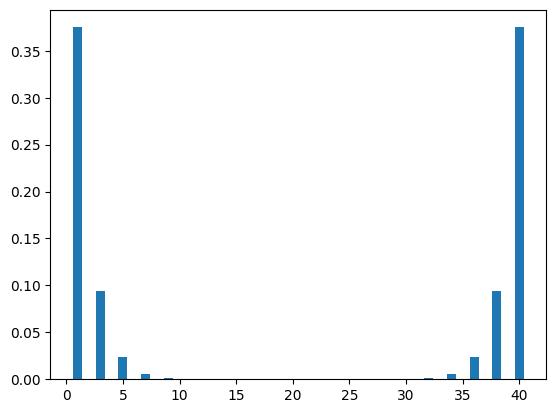

In [433]:
plt.bar([i for i in range(1,int(2*N)+1)], denv1)

<h3>Driven SSH</h3>

In [11]:
g0 = 1
delta = -0.2
v = g0 + delta
w = g0 - delta
V = 1
W = 2*g0 
dk = 0.0 1

# kv = np.arange(-np.pi, np.pi+dk , dk)
latsize = 15
k = 0
h = Hf(latsize, v, w, k, V, W)
# bands = [ [] for i in range(2*latsize) ]
# for i in kv:
#     eigs = np.sort(la.eigvals(Hf(latsize, v, w, i, V, W)))
#     for j in range(2*latsize):
#         bands[j].append(np.real(eigs[j]))

In [12]:
eig, eigv = la.eigh(h)
eig

array([-3.20000000e+01, -3.00000000e+01, -2.80000000e+01, -2.80000000e+01,
       -2.60000000e+01, -2.60000000e+01, -2.40000000e+01, -2.40000000e+01,
       -2.20000000e+01, -2.20000000e+01, -2.00000000e+01, -2.00000000e+01,
       -1.80000000e+01, -1.80000000e+01, -1.60000000e+01, -1.60000000e+01,
       -1.40000000e+01, -1.40000000e+01, -1.20000000e+01, -1.20000000e+01,
       -1.00000000e+01, -1.00000000e+01, -8.00000000e+00, -8.00000000e+00,
       -6.00000000e+00, -6.00000000e+00, -4.00000000e+00, -4.00000000e+00,
       -2.00000000e+00,  1.61345481e-21])

In [547]:
eig[15]

np.float64(-15.99999999999997)

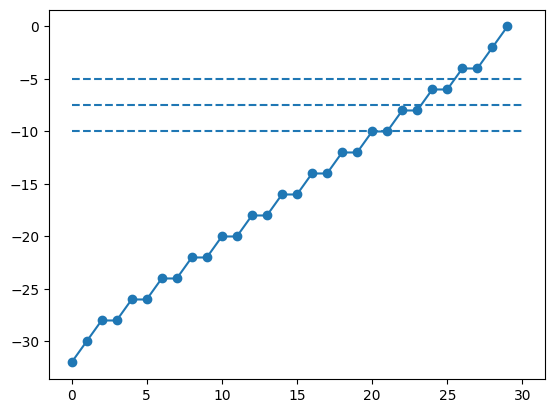

In [14]:
plt.hlines(y=[-5, -7.5, -10], xmin=0, xmax=30, linestyle='--')
plt.plot(eig, 'o-')

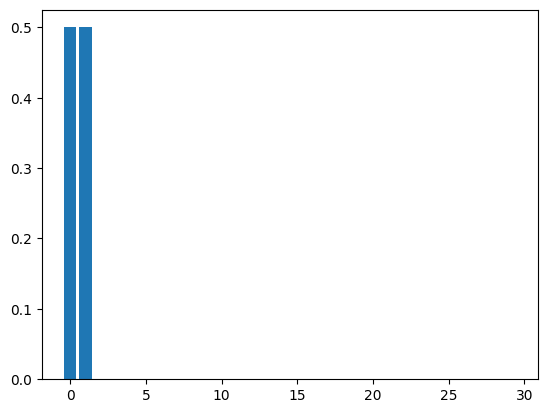

In [582]:
v1 = np.array(eigv[:,26])
denv1 = np.conjugate(v1)*v1
plt.bar([i for i in range(len(denv1))], np.real(denv1))
plt.show()

In [472]:
denv1

array([0.00000000e+00+0.00000000e+00j, 1.26467482e-34+8.76211174e-66j,
       5.00000000e-01-6.47898794e-18j, 5.00000000e-01+2.11701801e-18j,
       9.86076132e-32+0.00000000e+00j, 1.11703937e-31+0.00000000e+00j])

<h2>Finite chain (driven), floquet hamiltonian</h2>

In [374]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [444]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
import scipy.integrate as integrate
from scipy.linalg import ishermitian

In [445]:
def Hnxn(N, v, w): #finite chain driven ssh
    H = np.zeros((2*N, 2*N))
    H[0,1] = v
    H[2*N-1, 2*N-2] = v
    for i in range(1, 2*N-1):
        if(i%2 == 0):
            H[i, i-1] = w
            H[i, i+1] = v
        else:
            H[i, i-1] = v
            H[i, i+1] = w
    return H
    
def Hnm(N, n, m, v, w, V, W):
    hnm = np.zeros((2*N, 2*N), dtype=complex)
    T = 2*np.pi/W
    hnm[0,1] = (1/T)*(integrate.quad(lambda t: np.real((v - V*np.cos(W*t))*np.exp(1j*(m-n)*W*t)), 0, 2*np.pi/W)[0] + 1j*integrate.quad(lambda t: np.imag((v - V*np.cos(W*t))*np.exp(-1j*(m-n)*W*t)), 0, 2*np.pi/W)[0])
    hnm[2*N-1, 2*N-2] = (1/T)*(integrate.quad(lambda t: np.real((v - V*np.cos(W*t))*np.exp(1j*(m-n)*W*t)), 0, 2*np.pi/W)[0] + 1j*integrate.quad(lambda t: np.imag((v - V*np.cos(W*t))*np.exp(-1j*(m-n)*W*t)), 0, 2*np.pi/W)[0])
    for i in range(1, 2*N-1):
        if(i%2 == 0):
            hnm[i, i-1] = (1/T)*(integrate.quad(lambda t: np.real((w + V*np.cos(W*t))*np.exp(1j*(m-n)*W*t)), 0, 2*np.pi/W)[0] + 1j*integrate.quad(lambda t: np.imag((w + V*np.cos(W*t))*np.exp(-1j*(m-n)*W*t)), 0, 2*np.pi/W)[0])
            hnm[i, i+1] = (1/T)*(integrate.quad(lambda t: np.real((v - V*np.cos(W*t))*np.exp(1j*(m-n)*W*t)), 0, 2*np.pi/W)[0] + 1j*integrate.quad(lambda t: np.imag((v - V*np.cos(W*t))*np.exp(-1j*(m-n)*W*t)), 0, 2*np.pi/W)[0])
        else:
            hnm[i, i-1] = (1/T)*(integrate.quad(lambda t: np.real((v - V*np.cos(W*t))*np.exp(1j*(m-n)*W*t)), 0, 2*np.pi/W)[0] + 1j*integrate.quad(lambda t: np.imag((v - V*np.cos(W*t))*np.exp(-1j*(m-n)*W*t)), 0, 2*np.pi/W)[0])
            hnm[i, i+1] = (1/T)*(integrate.quad(lambda t: np.real((w + V*np.cos(W*t))*np.exp(1j*(m-n)*W*t)), 0, 2*np.pi/W)[0] + 1j*integrate.quad(lambda t: np.imag((w + V*np.cos(W*t))*np.exp(-1j*(m-n)*W*t)), 0, 2*np.pi/W)[0])
    
    return hnm

In [446]:
def Hf(N, lat, v, w, V, W):
    blocks = []
    for i in range(1, lat+1):
        row = []
        for j in range(1, lat+1):
            matij = Hnm(N, i, j, v, w, V, W)
            if (i==j):
                matij = matij - i*W*np.eye(2*N,dtype=complex)
            row.append(matij)
        blocks.append(row)
    m = np.block(blocks)
    # for i in range(m.shape[0]):
    #     m[i,i] = m[i,i] - i*W
    return m

In [568]:
g0 = 2
delta = -0.5
v = g0 + delta
w = g0 - delta
V = 1
W = 3*g0 
N = 30
replicas = 3

h = Hf(N, replicas, v, w, V, W)
eig, eigv = la.eigh(h)

In [569]:
bulkmodes = []
edgeindex = []
for i in range(len(eig)-1):
    if (np.abs(eig[i] - eig[i+1] ) < 1e-3):
        bulkmodes.append(eig[i])
        edgeindex.append(i)
        edgeindex.append(i+1)
gaps = [-W, -2*W, -3*W, -3*W/2, -5*W/2]

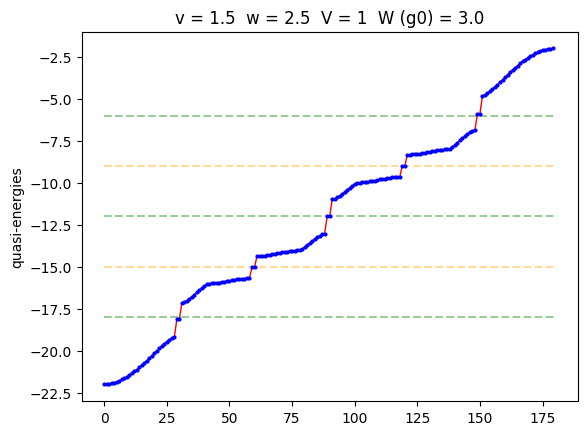

In [570]:
fig, ax = plt.subplots(1)
ax.hlines(y=[-W, -2*W, -3*W], xmin=0, xmax=N*2*replicas, color = 'green', linestyle='--', alpha=0.4)
ax.hlines(y=[-3*W/2, -5*W/2], xmin=0, xmax=N*2*replicas, color = 'orange', linestyle='--', alpha=0.4)
# ax.hlines(y=bulkmodes, xmin=60, xmax=120, color = 'orange', linestyle='--', alpha=0.4)
ax.plot(eig, 'r-', linewidth=1)
ax.plot(eig, 'bo', markersize=2)
plt.ylabel('quasi-energies')
tit = 'v = ' + str(v) + '  w = ' + str(w) + '  V = ' +str(V) + '  W (g0) = ' + str(W/g0)
plt.title(tit)
plt.show()
# plt.savefig('eigs/'+tit+'.png')

In [571]:
edgeindex

[29, 30, 57, 58, 59, 60, 89, 90, 119, 120, 121, 122, 149, 150]

In [596]:
ind = 149
v1 = eigv[:,ind]
denv1 = v1*v1

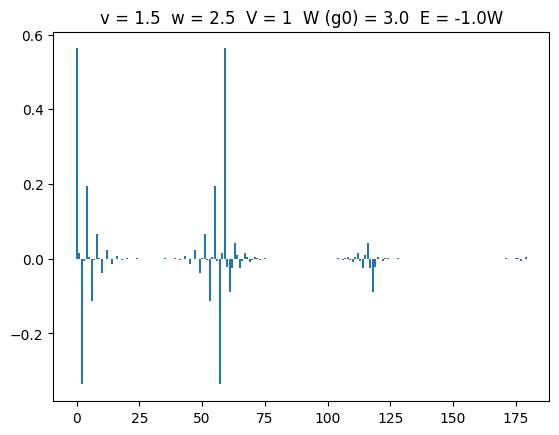

In [597]:
tit = 'v = ' + str(v) + '  w = ' + str(w) + '  V = ' +str(V) + '  W (g0) = ' + str(W/g0) + '  E = '+str(np.round(eig[ind]/W,1))+'W'
plt.title(tit)
plt.bar([i for i in range(len(denv1))],v1)
# plt.savefig('edgeWavefunction/'+tit+'.png')
plt.show()